## Clustering with K-Means

### Import libraries and load data

In [3]:
from sklearn.cluster import KMeans
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load data 
datadir_prep = 'dataset_prepared'
combined_df = pd.read_csv(os.path.join(datadir_prep, 'prepared_data.csv'))

clustering_df = combined_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']].dropna().reindex().astype(int)
combined_df, clustering_df

(        UserID  Gender    State ReferralSource   BirthDate State_Grouped  \
 0            3  Female   Tehran  Acquaintances  1984-11-07        Tehran   
 1            8    Male   Tehran  Acquaintances  1985-09-15        Tehran   
 2           14    Male   Tehran  Acquaintances  1977-09-29        Tehran   
 3           17  Female   Tehran  Acquaintances  1946-10-15        Tehran   
 4           18  Female   Tehran  Acquaintances  1955-12-28        Tehran   
 ...        ...     ...      ...            ...         ...           ...   
 221172  262138  Female  Isfahan    Application  1996-02-28         Other   
 221173  262139    Male   Tehran    Application  1978-07-01        Tehran   
 221174  262140    Male   Tehran    Application  1975-12-22        Tehran   
 221175  262141    Male     Fars    Application  1994-08-22         Other   
 221176  262143    Male   Tehran       Agencies  1971-04-01        Tehran   
 
          Age  TotalAmount  Frequency  Recency  Duration  Recency_cat  \
 

### Apply the Elbow method to find the optimal value of k

Processing k = 2
Inertia = 8.382997564970224e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9982526441403553
Davies-Bouldin score =  0.0012883215711681256
Processing k = 3
Inertia = 4.5175821209568543e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9641969175823166
Davies-Bouldin score =  0.3493861471925557
Processing k = 4
Inertia = 2.723953193613822e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.9494035144339855
Davies-Bouldin score =  0.3560419692418253
Processing k = 5
Inertia = 1.6327584524049754e+18
Labels = [0 0 0 ... 0 0 0]
Silhouette score =  0.8890600743067397
Davies-Bouldin score =  0.3320695708323644
Processing k = 6
Inertia = 9.99186245849545e+17
Labels = [5 5 5 ... 5 5 5]
Silhouette score =  0.8315926504725987
Davies-Bouldin score =  0.3646959530869536
Processing k = 7
Inertia = 6.988395141685856e+17
Labels = [5 5 5 ... 5 5 0]
Silhouette score =  0.780822500852186
Davies-Bouldin score =  0.39393698734780536
Processing k = 8
Inertia = 4.913288262789174e+17

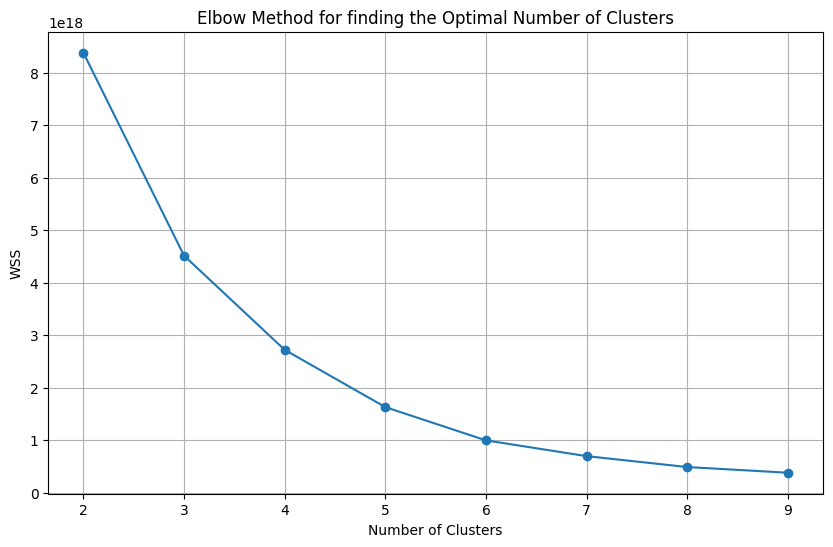

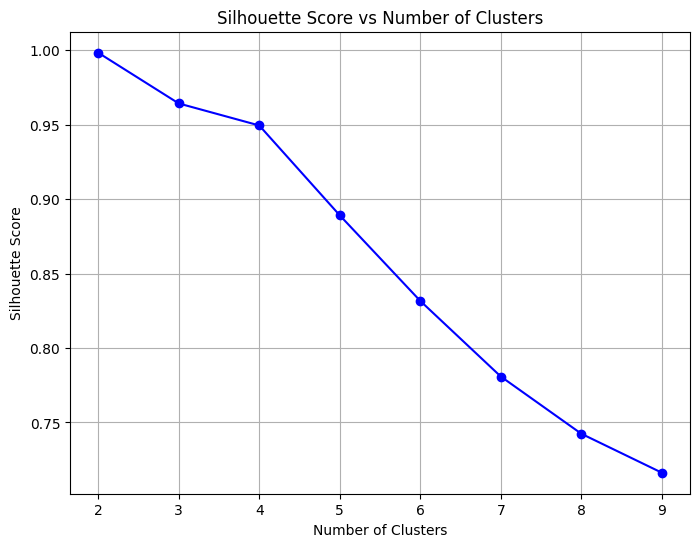

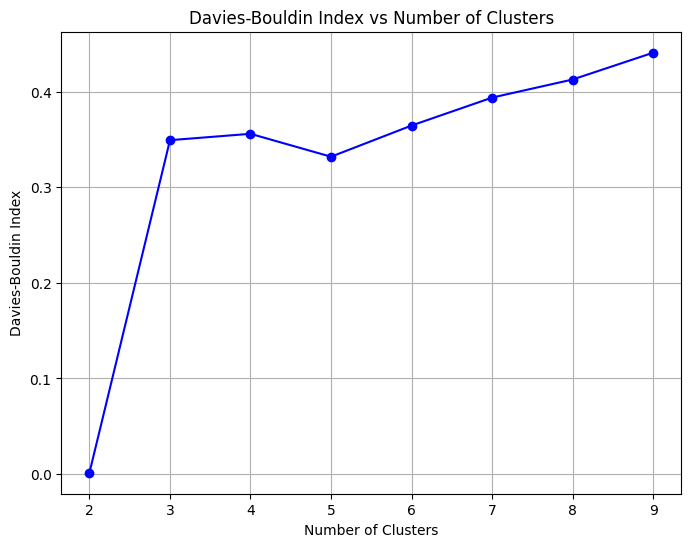

In [7]:
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

figdir = 'figures'
os.makedirs(figdir, exist_ok=True)

nb_clusters = range(2, 10)

wss = [] # store Within-Cluster Sum of Squares values
sil_scores = [] # store the silhouette scores for each number of clusters
dbi_scores = [] # store the Davies-Bouldin index for internal validation: lower -> cluster is more compact and separated

# run on a sample to reduce time
clustering_df_sample = clustering_df.sample(n=30000, random_state=42)

for k in nb_clusters:
  print('Processing k =', k)
  kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=500, tol=0.0001, random_state=111, algorithm='lloyd')
  kmeans.fit(clustering_df_sample)

  inertia = kmeans.inertia_
  print("Inertia =", inertia)
  wss.append(inertia)

  # predict the cluster labels
  labels = kmeans.predict(clustering_df_sample)
  print('Labels =', labels)

  silscore = silhouette_score(clustering_df_sample, labels)
  print('Silhouette score = ', silscore)
  sil_scores.append(silscore)

  dbi = davies_bouldin_score(clustering_df_sample, labels)
  print('Davies-Bouldin score = ', dbi)
  dbi_scores.append(dbi)


# plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(nb_clusters, wss, marker='o')
plt.title('Elbow Method for finding the Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('elbow.png', dpi=450)
plt.show()

# plot the silhouette scores with numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(nb_clusters, sil_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('silhouette.png', dpi=450)
plt.show()

# plot the DBI with numbers of clusters
plt.figure(figsize=(8, 6))
plt.plot(nb_clusters, dbi_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xticks(nb_clusters)
plt.grid(True)
plt.savefig('dbi.png', dpi=450)
plt.show()


### Select value of k, group data by cluster and calculate mean for each score

1. Elbow Method (WSS - Within-Cluster Sum of Squares)
    - WSS (Inertia) decreases as 𝑘 increases.
    - The rate of decrease slows down after 𝑘 = 4, forming an "elbow," indicating that adding more clusters beyond this point yields diminishing returns.

2. Silhouette Score (Measures Cluster Cohesion and Separation)
    - The Silhouette Score is highest for 𝑘 = 2(0.998), but such a high score often means one dominant cluster and poor separation.
    - For 𝑘 = 4, the score is 0.949, which is still high, meaning well-separated clusters.
    - Beyond 𝑘 = 4, the score starts decreasing significantly.

3. Davies-Bouldin Index (Lower is Better)
    - 𝑘 = 2 has the lowest DBI (0.001), but again, likely due to one dominant cluster.
    - 𝑘 = 4 has a DBI of 0.356, which is relatively low, indicating good cluster compactness.
    - Beyond 𝑘 = 4, the DBI starts increasing (higher values indicate worse clustering).

4. Practical Interpretation
    - 𝑘 = 2 and 𝑘 = 3 might oversimplify the dataset, grouping distinct user behaviors together.
    - 𝑘 = 5 and beyond start showing worse compactness and separation.
    - 𝑘 = 4 is a good balance between meaningful segmentation and performance

### Clustering Analysis Summary



In [6]:
# Create a copy of X_kmeans
X_kmeans = clustering_df.copy()

clustering_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']] = clustering_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']].astype(int)

# Group by cluster and calculate the mean for each score
clustering_df['Cluster'] = KMeans(n_clusters=4, random_state=111).fit_predict(clustering_df)
cluster_means = clustering_df.groupby('Cluster').mean()

# Calculate the number of records and percentage for each cluster
cluster_counts = clustering_df['Cluster'].value_counts().sort_index()
cluster_percentages = (cluster_counts / len(clustering_df)) * 100
cluster_counts_summary = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Count': cluster_counts.values,
    'Percentage': cluster_percentages.values    
})

# Calculate the overall mean for each score
overall_mean = clustering_df[['Recency', 'Frequency', 'TotalAmount', 'Duration']].mean()
overall_mean.name = 'Overall'

# Merge cluster_summary with cluster_counts
cluster_summary = cluster_means.merge(cluster_counts_summary, left_index=True, right_on='Cluster')

# Append the overall mean to the cluster summary
overall_summary = pd.DataFrame([overall_mean], columns=cluster_summary.columns[:-2])
overall_summary['Cluster'] = 'Overall'
overall_summary['Count'] = len(clustering_df)
overall_summary['Percentage'] = 100.0

cluster_summary = pd.concat([cluster_summary, overall_summary], ignore_index=True)

# Display the results
print("Cluster Summary:")
display(cluster_summary)

Cluster Summary:


,Recency,Frequency,TotalAmount,Duration,Cluster,Count,Percentage
0,2696.056060,5.675741,4.015873e+06,284.078838,0,219374,99.186161
1,2543.538462,33.153846,3.155676e+09,630.461538,1,13,0.005878
2,2584.311111,27.192593,6.814281e+08,488.866667,2,135,0.061038
3,2539.104116,20.731235,1.127182e+08,598.052663,3,1652,0.746923
4,2694.806578,5.802942,5.426520e+06,286.569339,Overall,221174,100.000000


### Interpret Cluster Characteristics

,Recency,Frequency,TotalAmount,Duration,Cluster,Cluster_Label
0,2418,21,8476500,824,0,Loyal High-Value Donors
1,3033,1,7364000,0,0,Loyal High-Value Donors
2,2660,2,3200000,232,0,Loyal High-Value Donors
3,2442,8,57840000,739,0,Loyal High-Value Donors
4,2871,1,2248000,0,0,Loyal High-Value Donors
...,...,...,...,...,...,...
221172,2468,3,80000,207,0,Loyal High-Value Donors
221173,2400,6,680000,166,0,Loyal High-Value Donors
221174,2401,16,220008,279,0,Loyal High-Value Donors
221175,2483,5,70000,198,0,Loyal High-Value Donors


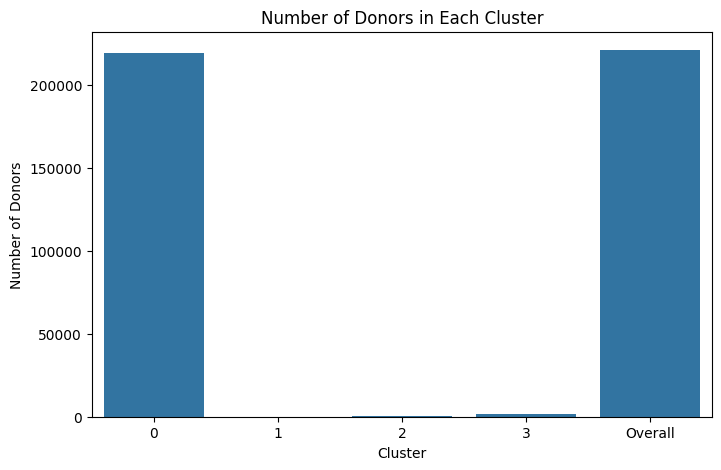

In [10]:
# Assign cluster labels based on observed characteristics
cluster_labels = {
    0: "Loyal High-Value Donors",
    1: "Infrequent Small Donors",
    2: "New Donors",
    3: "Lapsed Big Donors"
}

# Map labels to cluster numbers
clustering_df['Cluster_Label'] = clustering_df['Cluster'].map(cluster_labels)

display(clustering_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=cluster_summary['Cluster'].astype(str), y=cluster_summary['Count'])
plt.xlabel("Cluster")
plt.ylabel("Number of Donors")
plt.title("Number of Donors in Each Cluster")
plt.show()



In [27]:
cluster_summary['CLV'] = (cluster_summary['mean_Recency_Score'] * rfm_weights['Recency'] + 
                          cluster_summary['mean_Frequency_Score'] * rfm_weights['Frequency'] + 
                          cluster_summary['mean_Monetary_Score'] * rfm_weights['TotalAmount'] +
                          cluster_summary['mean_D_Score'] * rfm_weights['Duration'])

cluster_summary = cluster_summary.sort_values(by='CLV', ascending=False)
display(cluster_summary)


,Cluster,mean_Recency_Score,mean_Frequency_Score,mean_Monetary_Score,mean_D_Score,mean_Silhouette,count,percentage,CLV
1,Inactive,2543.538462,33.153846,3.155676e+09,630.461538,None,13,0.005878,3.155679e+09
2,Monetary Low,2584.311111,27.192593,6.814281e+08,488.866667,None,135,0.061038,6.814312e+08
3,Best,2539.104116,20.731235,1.127182e+08,598.052663,None,1652,0.746923,1.127213e+08
4,Mid Engagement,2694.806578,5.802942,5.426520e+06,286.569339,None,221174,100.000000,5.429508e+06
0,Low Engagement,2696.056060,5.675741,4.015873e+06,284.078838,None,219374,99.186161,4.018859e+06


### Post Processing

#### Merge Datasets on UserID

In [ ]:
# Use combined_df as the merged dataset

# Check merged data
print(combined_df.head())


          Cluster  mean_Recency_Score  mean_Frequency_Score  \
1        Inactive         2543.538462             33.153846   
2    Monetary Low         2584.311111             27.192593   
3            Best         2539.104116             20.731235   
4  Mid Engagement         2694.806578              5.802942   
0  Low Engagement         2696.056060              5.675741   

   mean_Monetary_Score  mean_D_Score mean_Silhouette   count  percentage  \
1         3.155676e+09    630.461538            None      13    0.005878   
2         6.814281e+08    488.866667            None     135    0.061038   
3         1.127182e+08    598.052663            None    1652    0.746923   
4         5.426520e+06    286.569339            None  221174  100.000000   
0         4.015873e+06    284.078838            None  219374   99.186161   

            CLV  
1  3.155679e+09  
2  6.814312e+08  
3  1.127213e+08  
4  5.429508e+06  
0  4.018859e+06  


#### Customer Profiling

In [38]:
from scipy.stats import f_oneway

anova_results = {}
features = ['Recency', 'Frequency', 'TotalAmount', 'Duration']

for feature in features:
    groups = [clustering_df[clustering_df['Cluster'] == c][feature] for c in clustering_df['Cluster'].unique()]
    stat, p_value = f_oneway(*groups)
    anova_results[feature] = p_value

# Display results
print("ANOVA Test Results:")
print(pd.DataFrame(anova_results, index=["p-value"]).T)

from scipy.stats import chi2_contingency

# Example: Checking gender distribution across clusters
contingency_table = pd.crosstab(combined_df['Gender'], clustering_df['Cluster'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square test p-value: {p:.4f}")

def classify_customer(row):
    if row['Frequency'] > 10 and row['TotalAmount'] > 500:
        return "High-Value Loyal Donor"
    elif row['Recency'] < 30 and row['TotalAmount'] < 100:
        return "New Low-Value Donor"
    elif row['Duration'] > 365 and row['TotalAmount'] > 1000:
        return "Long-Term High Donor"
    else:
        return "Occasional Small Donor"

combined_df['Customer_Profile'] = combined_df.apply(classify_customer, axis=1)

# Display the updated dataframe with the new 'Customer_Profile' column
print("Updated DataFrame with Customer Profiles:")
display(combined_df[['UserID', 'Customer_Profile']].head())



ANOVA Test Results:
                   p-value
Recency      4.964621e-146
Frequency    5.805796e-256
TotalAmount   0.000000e+00
Duration      0.000000e+00
Chi-square test p-value: 0.0000
Updated DataFrame with Customer Profiles:


,UserID,Customer_Profile
0,3,High-Value Loyal Donor
1,8,Occasional Small Donor
2,14,Occasional Small Donor
3,17,Long-Term High Donor
4,18,Occasional Small Donor


#### Visualize Target Group Characteristics

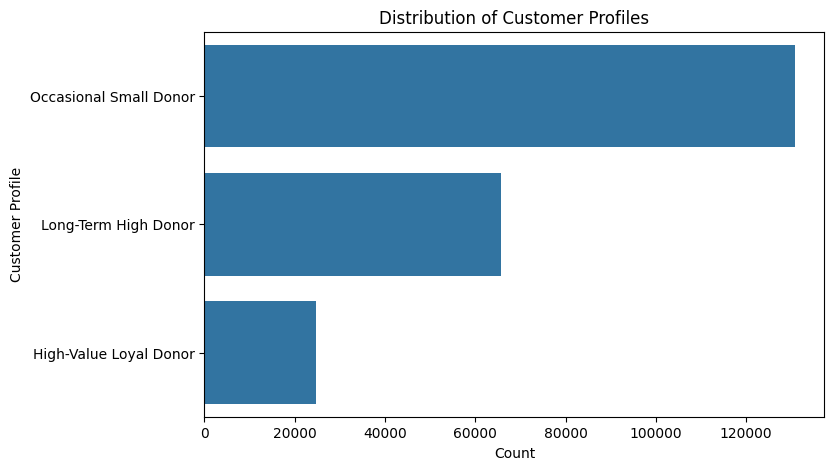

In [40]:
plt.figure(figsize=(8,5))
sns.countplot(y=combined_df['Customer_Profile'], order=combined_df['Customer_Profile'].value_counts().index)
plt.xlabel("Count")
plt.ylabel("Customer Profile")
plt.title("Distribution of Customer Profiles")
plt.show()


#### Hypothesis

In [68]:
from scipy.stats import f_oneway

anova_results = {}
features = ['Recency', 'Frequency', 'TotalAmount', 'Duration']

for feature in features:
    groups = [clustering_df[clustering_df['Cluster'] == c][feature] for c in clustering_df['Cluster'].unique()]
    stat, p_value = f_oneway(*groups)
    anova_results[feature] = p_value

# Display results
anova_df = pd.DataFrame(anova_results, index=["p-value"]).T
display(anova_df)

display(combined_df)

,p-value
Recency,4.964621e-146
Frequency,5.805796e-256
TotalAmount,0.000000e+00
Duration,0.000000e+00


,UserID,Gender,State,TotalAmount,Frequency,Recency,Duration,Customer_Profile
0,3,Female,Tehran,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor
1,3,Female,Tehran,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor
2,3,Female,Tehran,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor
3,3,Female,Tehran,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor
4,3,Female,Tehran,8476500.0,21.0,2418.0,824.0,High-Value Loyal Donor
...,...,...,...,...,...,...,...,...
90595912,262141,Male,Fars,70000.0,5.0,2483.0,198.0,Occasional Small Donor
90595913,262141,Male,Fars,70000.0,5.0,2483.0,198.0,Occasional Small Donor
90595914,262141,Male,Fars,70000.0,5.0,2483.0,198.0,Occasional Small Donor
90595915,262141,Male,Fars,70000.0,5.0,2483.0,198.0,Occasional Small Donor


In [72]:
# Load the CSV in chunks
chunk_size = 9000  # Adjust as needed
transactional_chunks = pd.read_csv('datasets/TransactionalData.csv', usecols=['UserID', 'SupportType'], chunksize=chunk_size)

# Process chunks separately and append to list
chunks = []
for chunk in transactional_chunks:
    chunks.append(chunk)

# Concatenate all chunks into a DataFrame
transactional_df = pd.concat(chunks, ignore_index=True)

# Now merge with combined_df
combined_df = combined_df[['UserID', 'Gender', 'TotalAmount', 'Frequency', 'Recency', 'Duration','Customer_Profile']]
combined_df = combined_df.merge(transactional_df, on='UserID', how='left')

display(combined_df)


MemoryError: Unable to allocate 2.70 GiB for an array with shape (4, 90595917) and data type float64

In [52]:
from scipy.stats import chi2_contingency

categorical_features = ['Gender', 'SupportType']  # Ensure these columns exist in combined_df
chi2_results = {}

for feature in categorical_features:
    contingency_table = pd.crosstab(combined_df[feature], clustering_df['Cluster'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results[feature] = p

# Display results
chi2_df = pd.DataFrame(chi2_results, index=["p-value"]).T
print("Contingency Table with Frequencies:")
print(contingency_table)
print("#" * 60)

# Calculate row percentages
row_percentages = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

print("\nRow Percentages:")
print(row_percentages)
print("#" * 60)

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-squared value: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Contingency Table with Frequencies:
Cluster                0   1    2     3
SupportType                            
Cash               12438   0    9    86
Financial Aid       4604   0    1    37
Household Fund     23921   2   15   202
Membership Fee    177006  11  110  1314
Product Purchase    1405   0    0    13
############################################################

Row Percentages:
Cluster                   0         1         2         3
SupportType                                              
Cash              99.242001  0.000000  0.071810  0.686188
Financial Aid     99.181387  0.000000  0.021542  0.797070
Household Fund    99.092792  0.008285  0.062138  0.836785
Membership Fee    99.195813  0.006165  0.061645  0.736378
Product Purchase  99.083216  0.000000  0.000000  0.916784
############################################################

Chi-squared value: 7.888353422887479
P-value: 0.7937931917618706
Degrees of freedom: 12
